In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
air_df = pd.read_table("http://www.stat.ufl.edu/~winner/data/airq402.dat", sep="\s+", header = None)
air_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [9]:
air_df.columns = ['city1','city2','Average_Fare',
                     'Distance','Average_weekly_passengers','market_leading_airline','market_share','Average_fare','Low_price_airline','market_share','price']
air_df.head()

,city1,city2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [12]:
print("The shape of the data is " + str(air_df.shape))
air_df.dtypes

The shape of the data is (1000, 11)


city1                         object
city2                         object
Average_Fare                 float64
Distance                       int64
Average_weekly_passengers    float64
market_leading_airline        object
market_share                 float64
Average_fare                 float64
Low_price_airline             object
market_share                 float64
price                        float64
dtype: object

In [15]:
air_df.describe()


,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Index(['city1', 'city2', 'Average_Fare', 'Distance',
       'Average_weekly_passengers', 'market_leading_airline', 'market_share',
       'Average_fare', 'Low_price_airline', 'market_share', 'price'],
      dtype='object')

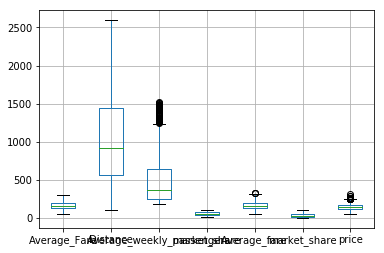

In [24]:
##Removing the outliers from the data
air_df.plot.box(grid='True')
air_df.columns

In [23]:
air_df.head()

numeric_cols = air_df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    sorted_col = air_df.sort_values([col])
    q1, q3= np.percentile(sorted_col[col],[25,75])
    print(q1,q3)
    iqr = q3 - q1
    mincap = q1 -(1.5 * iqr) 
    maxcap = q3 +(1.5 * iqr) 
    air_df = air_df.loc[(air_df[col] > mincap) & (air_df[col] < maxcap)]

print('Shape after Outlier treatment',air_df.shape)


125.975 197.39249999999998
550.0 1399.0
256.95 768.04


ValueError: The column label 'market_share' is not unique.

In [25]:

features = ['Distance', 'price','Average_weekly_passengers', 'market_share', 'Average_fare']

#Independent Variable 
y = air_df['Average_Fare']

#Dependent Variable 
x = air_df[features]
print(x)
print(y)

     Distance   price  Average_weekly_passengers  market_share  market_share  \
0         528  111.03                     424.56         70.19         70.19   
1         860  118.94                     276.84         75.10         17.23   
2         852  167.12                     215.76         78.89          2.77   
3         288   68.86                     606.84         96.97         96.97   
4         723  145.42                     313.04         39.79         15.34   
5        1204  127.69                     199.02         40.68         17.09   
6        2237  148.59                     237.17         59.94         59.94   
7        2467  174.00                     191.95         17.89         16.59   
8        1073  127.69                     550.54         76.84         76.84   
9        1130  124.78                     202.93         35.40         26.40   
10       1269  200.93                     198.80         68.39         11.91   
11       1670  161.39                   

In [28]:
air_df.isnull().sum().sum()

0

C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


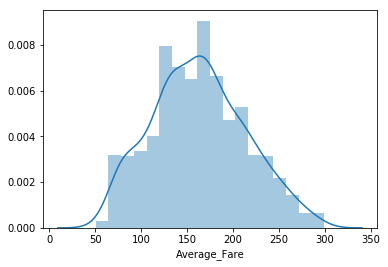

In [31]:
sns.distplot(air_df['Average_Fare'])

In [33]:
corr_matrix=air_df.corr()
corr_matrix["Average_fare"].sort_values(ascending=False)

Average_fare                 1.000000
Average_Fare                 0.980411
price                        0.816671
Distance                     0.504017
Average_weekly_passengers   -0.159413
market_share                -0.203422
market_share                -0.483246
Name: Average_fare, dtype: float64

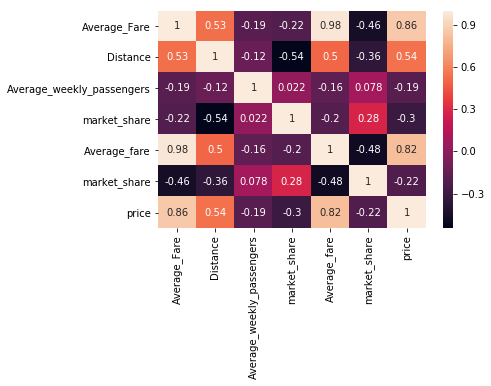

In [35]:
sns.heatmap(corr_matrix, annot=True)

In [37]:
updated_df=air_df.drop(['Average_weekly_passengers', 'market_share'], axis=1)
updated_df.head()

,city1,city2,Average_Fare,Distance,market_leading_airline,Average_fare,Low_price_airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42


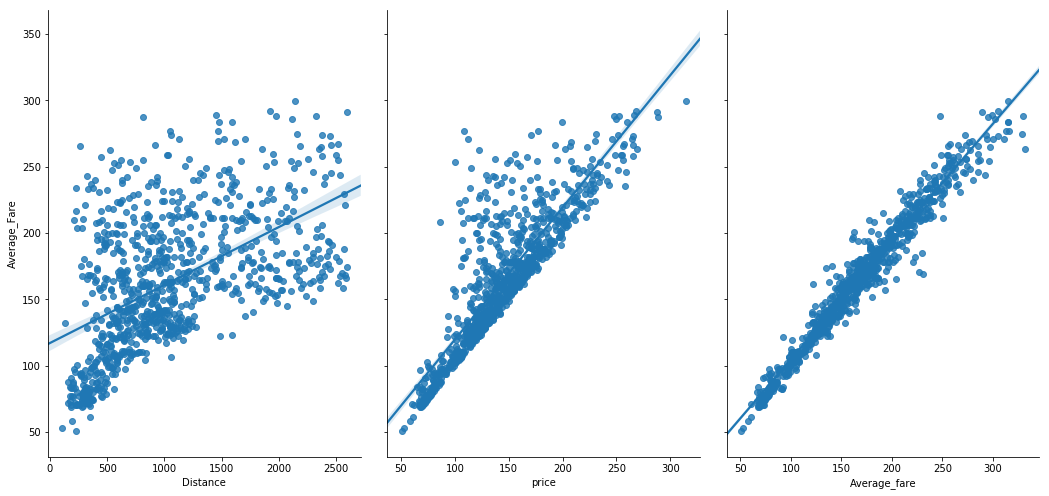

In [40]:
sns.pairplot(updated_df,x_vars=['Distance', 'price', 'Average_fare'],y_vars=['Average_Fare'],kind='reg',size=7,aspect=0.7)


In [42]:
numeric_df = updated_df.drop(['city1','city2','market_leading_airline','Low_price_airline'], axis=1)
numeric_df.head()

,Average_Fare,Distance,Average_fare,price
0,114.47,528,111.03,111.03
1,122.47,860,123.09,118.94
2,214.42,852,223.98,167.12
3,69.40,288,68.86,68.86
4,158.13,723,161.36,145.42


In [44]:
new_array=numeric_df.values # convert the data frame to a numpy array
print(type(new_array))
print(new_array)

<class 'numpy.ndarray'>
[[114.47 528.   111.03 111.03]
 [122.47 860.   123.09 118.94]
 [214.42 852.   223.98 167.12]
 ...
 [159.97 814.   159.65 159.02]
 [ 73.57 174.    73.44  73.44]
 [126.67 859.   129.92 121.94]]


In [45]:
print(new_array.shape)
new_array=new_array[:,1:]
print(new_array.shape)

(904, 4)
(904, 3)


In [47]:
#remove the features and target
X_data=new_array[:,1:]# from first column to all , with all rows 
Y_data=new_array[:,0:1]# First column, with all rows

In [48]:
print(X_data.shape)
print(X_data)

(904, 2)
[[111.03 111.03]
 [123.09 118.94]
 [223.98 167.12]
 ...
 [159.65 159.02]
 [ 73.44  73.44]
 [129.92 121.94]]


In [50]:
print(Y_data.shape)
print(Y_data)

(904, 1)
[[ 528.]
 [ 860.]
 [ 852.]
 [ 288.]
 [ 723.]
 [1204.]
 [2237.]
 [2467.]
 [1073.]
 [1130.]
 [1269.]
 [1670.]
 [1121.]
 [ 580.]
 [ 349.]
 [ 767.]
 [ 487.]
 [ 677.]
 [ 981.]
 [1825.]
 [ 889.]
 [1552.]
 [ 328.]
 [1111.]
 [ 628.]
 [1180.]
 [ 321.]
 [1650.]
 [ 324.]
 [ 545.]
 [ 812.]
 [ 576.]
 [ 712.]
 [ 227.]
 [ 373.]
 [ 554.]
 [ 446.]
 [ 432.]
 [1199.]
 [ 594.]
 [ 644.]
 [ 581.]
 [ 515.]
 [ 306.]
 [ 352.]
 [ 859.]
 [ 696.]
 [ 432.]
 [ 270.]
 [ 692.]
 [1747.]
 [1946.]
 [ 321.]
 [ 332.]
 [ 595.]
 [ 669.]
 [ 906.]
 [ 214.]
 [ 425.]
 [ 508.]
 [ 516.]
 [2130.]
 [ 761.]
 [ 821.]
 [1900.]
 [ 403.]
 [ 272.]
 [1587.]
 [ 526.]
 [2172.]
 [ 903.]
 [ 356.]
 [ 481.]
 [ 749.]
 [2092.]
 [ 483.]
 [1589.]
 [ 874.]
 [1891.]
 [2139.]
 [2116.]
 [1919.]
 [ 215.]
 [2182.]
 [ 223.]
 [ 406.]
 [ 545.]
 [ 781.]
 [ 977.]
 [ 982.]
 [ 852.]
 [ 914.]
 [1340.]
 [ 972.]
 [ 183.]
 [ 768.]
 [ 525.]
 [ 160.]
 [1085.]
 [1238.]
 [ 335.]
 [1035.]
 [ 753.]
 [ 446.]
 [1519.]
 [ 995.]
 [ 868.]
 [1161.]
 [ 717.]
 [1161.]
 

In [51]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(723, 2)
(723, 1)
(181, 2)
(181, 1)


In [55]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()

In [57]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print("the coefficients ",regressor.coef_)
print("the intercept ",regressor.intercept_) 

the coefficients  [[2.29574976 4.872215  ]]
the intercept  [-36.49095639]


In [62]:
p=regressor.intercept_
q=regressor.coef_

In [64]:
# the model of the multilinear regression model
y=p*X_train+q
print("the model of the multilinear regression model:=",y)

the model of the multilinear regression model:= [[-9160.94831014 -9158.37184489]
 [-3372.75280705 -2372.51359401]
 [-5047.32279593 -3968.62802665]
 ...
 [-2607.17254192 -2604.59607667]
 [-5752.32807345 -3962.78947363]
 [-5863.26058088 -4927.2454511 ]]


In [66]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

In [68]:
print(rmse)

479.7729516564022


In [70]:
regressor.score(X_train,y_train)

0.2753707094310732

In [71]:

regressor.score(X_test,y_test)

0.40383341119926897